In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *

# get centerline from Reynolds stresses (vector)
def get_centerline(directory,y,tID):
    nmodes = 10
    dat = np.fromfile( directory + 'shearlayer_Rij_%04d'%(tID)+'.dat',dtype=float, count=-1, sep=' ')
    n = np.size(dat)
    nstats=6
    dat = np.reshape(dat,[n/nstats,nstats])
    yc = 0
    for i in [1]: #u"v"
        ic = np.argmax(smooth_modes(abs(dat[:,i]),nmodes))
        yc += y[ic]
    #yc /= 1.
    #ic = np.argmin(abs(y-yc))
    return ic,y[ic]

In [13]:
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x512x128/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/512x724x256/'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/'

filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))
steps = sorted(reader.steps)

inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(Ly/2.,-Ly/2.,Ny)

print("Steps: {}".format(steps))

Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
Steps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


(668, 3.0684174153420827)


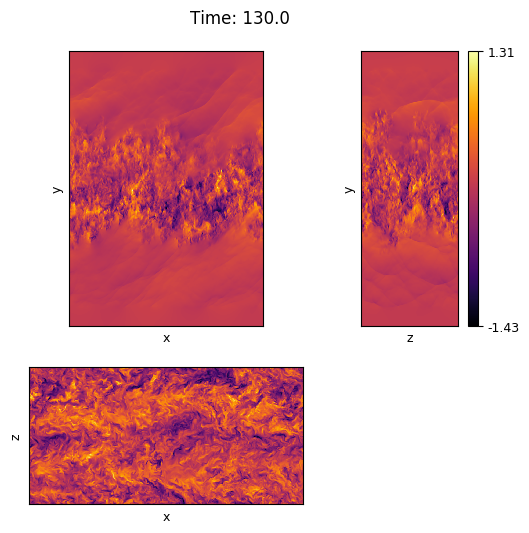

In [14]:

def visualize_all_planes(Nx,Ny,Nz, reader, qname, ic, cmap, savename=''):
    
    fig = plt.figure(figsize=(6,6), dpi=100) 
    gs = gridspec.GridSpec(2,2,width_ratios=[Nx/Nz,0.8],height_ratios=[Ny/Nz,1])
    #gs.update(wspace=0.005, hspace=0.05) # set the spacing between axes. 
    
    labelsize = 0.75*fs
    
    ax = {}
    for i in range(3):
        ax[i] = plt.subplot(gs[i])
        ax[i].set_xticks([])
        ax[i].set_yticks([]) 
    
    q = reader.readData(qname)
    q = np.squeeze(np.array(q))
    maxval = np.amax(q[:,:,0]);
    minval = np.amin(q[:,:,0]);
    
    # xy plane
    a = ax[0]
    im = a.imshow( np.transpose(q[:,:,0]), vmin=minval, vmax=maxval, cmap=cmap, origin='lower', interpolation='nearest')#spline36
    a.set_xlabel('x',fontsize=labelsize)
    a.set_ylabel('y',fontsize=labelsize)
    
    # yz plane
    a = ax[1]
    im = a.imshow( q[0,:,:], vmin=minval, vmax=maxval, cmap=cmap, origin='lower', interpolation='nearest')#spline36
    a.set_xlabel('z',fontsize=labelsize)
    a.set_ylabel('y',fontsize=labelsize)
    
    # xz plane
    a = ax[2]
    im = a.imshow( np.transpose(np.squeeze(q[:,ic,:])), vmin=minval, vmax=maxval, cmap=cmap, origin='lower', interpolation='nearest')#spline36
    a.set_xlabel('x',fontsize=labelsize)
    a.set_ylabel('z',fontsize=labelsize) 
    
    # set the colorbar
    divider1 = make_axes_locatable(ax[1])
    cax = divider1.append_axes('right', size='10%', pad=0.1)
    cbar = plt.colorbar(im, cax,ticks=[minval, maxval])
    cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
    cbar.ax.tick_params(labelsize=labelsize)   
    
    # set the overall title and save
    fig.suptitle('Time: {}'.format(np.around(reader.time,-1)),size=fs,y=0.95)
    if savename:
        plt.savefig(savename, dpi=300,bbox_inches='tight')
        plt.close(fig)
        print "Saved plot to ",savename
    else: plt.show()

reader.step = max(steps)
ic, yc = get_centerline(directory,y,max(steps))
print(ic,yc)

qname='v'
visualize_all_planes(Nx,Ny,Nz, reader, qname, ic=ic, cmap='inferno', savename='') #inferno,afmhot,viridis

In [15]:
# plot all
for step in steps[:-1]:
    reader.step = step
    savename = directory+"img/slice_%s_%04d.png"%(qname,step)
    visualize_all_planes(Nx,Ny,Nz, reader, qname, ic = int(Ny/2), cmap='inferno', savename=savename) 
    plt.close()

Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/img/slice_v_0000.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/img/slice_v_0001.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/img/slice_v_0002.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/img/slice_v_0003.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/img/slice_v_0004.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/img/slice_v_0005.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/img/slice_v_0006.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/img/slice_v_0007.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/img/slice_v_0008.png
S